<a href="https://colab.research.google.com/github/modem0011/Hoststar-views/blob/master/Hotstar_views.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preperation**


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("mediacompany.csv")

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [ ]:
data=data.drop("Unnamed: 7",axis=1)

In [ ]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [ ]:
data["Date"]=pd.to_datetime(data["Date"])

In [ ]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [ ]:
from datetime import datetime

In [ ]:
d0=datetime(2017,2,28)
d1=data.Date
delta=d1-d0
data["day"]=delta

In [ ]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [ ]:
 data["day"]=data["day"].astype(str)
 data["day"]=data["day"].map(lambda x:x[0:2])
 data["day"]=data["day"].astype(int)

In [ ]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


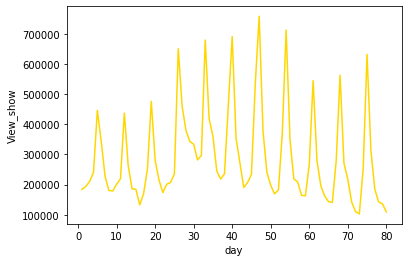

In [ ]:
plt.plot(data["day"],data["Views_show"],color="gold")
plt.xlabel("day")
plt.ylabel("View_show")
plt.show()

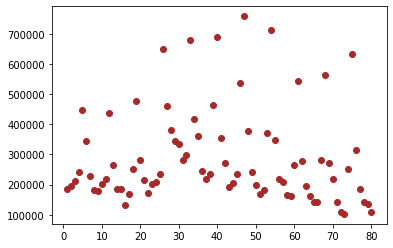

In [ ]:
plt.scatter(data["day"],data["Views_show"],color="brown")

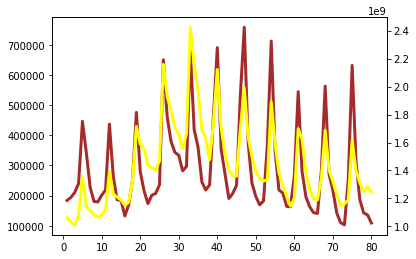

In [ ]:
fig,ax1=plt.subplots()
ax1.plot(data["day"],data["Views_show"],color="brown",linewidth=3)
ax2=ax1.twinx()
ax2.plot(data["day"],data["Ad_impression"],color="yellow",linewidth=3)
plt.show()

In [ ]:
data["weekday"]=(data["day"]+3)%7
data["weekday"]=data["weekday"].astype(int)

In [ ]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


#**Model**

In [ ]:
x=data[["Visitors","weekday"]]
y=data["Views_show"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(64, 2)

In [ ]:
y_train.shape

(64,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lm.predict(x_test)

In [ ]:
import statsmodels.api as sm 

In [ ]:
x_train1=sm.add_constant(x_train)
a=sm.OLS(y_train,x_train1).fit()

In [ ]:
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     33.37
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.62e-10
Time:                        18:31:38   Log-Likelihood:                -834.76
No. Observations:                  64   AIC:                             1676.
Df Residuals:                      61   BIC:                             1682.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.586e+04   1.23e+05     -0.534      0.595   -3.12e+05    1.81e+05
Visitors       0.2814      0.066      4.265      0.000       0.149       0.413
weekday    -3.664e+04   7797.806     -4.699      0.000   -5.22e+04    -2.1e+04
==============================================================================
Omnibus:                        1.340   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                1.320
Skew:                           0.328   Prob(JB):                        0.517
Kurtosis:                       2.745   Cond. No.                     1.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def condn(i):
  if i%7==5 or i%7==4:
    return 1
  else: 
    return 0
data["weekday"]=[condn(i)  for i in data["day"] ]    

In [ ]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [ ]:
x=data[["Visitors","weekday"]]
y=data["Views_show"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
import statsmodels.api as sm 

In [ ]:
x_train1=sm.add_constant(x_train)
a=sm.OLS(y_train,x_train1).fit()

In [ ]:
a.summary()    # little r2 increased

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     37.77
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.13e-11
Time:                        18:39:54   Log-Likelihood:                -832.62
No. Observations:                  64   AIC:                             1671.
Df Residuals:                      61   BIC:                             1678.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.694e+05   1.08e+05     -1.574      0.121   -3.85e+05    4.58e+04
Visitors       0.2452      0.066      3.721      0.000       0.113       0.377
weekday     1.798e+05   3.41e+04      5.273      0.000    1.12e+05    2.48e+05
==============================================================================
Omnibus:                        0.437   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.545
Skew:                           0.179   Prob(JB):                        0.762
Kurtosis:                       2.724   Cond. No.                     1.33e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x=data[["Visitors","weekday","Character_A"]]
y=data["Views_show"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train1=sm.add_constant(x_train)
a=sm.OLS(y_train,x_train1).fit()

In [ ]:
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     32.28
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.50e-12
Time:                        18:41:32   Log-Likelihood:                -827.66
No. Observations:                  64   AIC:                             1663.
Df Residuals:                      60   BIC:                             1672.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.331e+05   1.01e+05     -1.317      0.193   -3.35e+05     6.9e+04
Visitors        0.2057      0.063      3.278      0.002       0.080       0.331
weekday      1.794e+05   3.18e+04      5.640      0.000    1.16e+05    2.43e+05
Character_A  8.854e+04   2.79e+04      3.174      0.002    3.27e+04    1.44e+05
==============================================================================
Omnibus:                        0.861   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.895
Skew:                          -0.131   Prob(JB):                        0.639
Kurtosis:                       2.483   Cond. No.                     1.34e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,prev_views
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76,0,631962
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77,0,313945
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78,0,185689
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79,0,142260
79,2017-05-19,108961,1746735,2279036,1246026846,1,0,80,0,135871


In [ ]:
data['prev_views']=np.roll(data.Views_show,1)

In [ ]:
data.prev_views.replace(108961,0,inplace=True)   #last row =0

In [ ]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,prev_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,240061


In [ ]:
X=data[['Visitors','weekday','Character_A','prev_views']]
Y=data["Views_show"]
X1=sm.add_constant(X)
l1=sm.OLS(Y,X1).fit()
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           3.16e-21
Time:                        19:01:05   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      0.689   -1.78e+05    1.18e+05
Visitors        0.0659      0.047      1.394      0.167      -0.028       0.160
weekday      2.273e+05    2.4e+04      9.467      0.000    1.79e+05    2.75e+05
Character_A  5.527e+04   2.01e+04      2.748      0.008    1.52e+04    9.53e+04
prev_views      0.4317      0.065      6.679      0.000       0.303       0.560
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.821
Skew:                          -0.130   Prob(JB):                        0.663
Kurtosis:                       3.423   Cond. No.                     1.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X=data[['Ad_impression','weekday','Character_A']]
X1=sm.add_constant(X)
l1=sm.OLS(Y,X1).fit()                                    #coefficient for ad impression is very less
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.05e-26
Time:                        19:02:54   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
weekday         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data['Ad_impressionpermillion']=data.Ad_impression/1000000

In [ ]:

X=data[['Ad_impressionpermillion','weekday','Character_A']]
X1=sm.add_constant(X)
l1=sm.OLS(Y,X1).fit()                                    #coefficient for ad impression is very less
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.05e-26
Time:                        19:03:56   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
Ad_impressionpermillion   364.4670     36.909      9.875      0.000     290.957     437.977
weekday                   1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A              -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm
x1=sm.add_constant(X)
a=sm.OLS(Y,x1).fit()
y_pred=a.predict(X1)

In [ ]:
print(r2_score(y_pred,Y))

0.7541167825949279
